In [1]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


In [28]:
#Read in data and combine

boxoffice_1 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_1.csv'))
boxoffice_3 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_3.csv'))
boxoffice_4 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_4.csv'))
boffice_1 = boxoffice_1['0'].tolist()
boffice_3 = boxoffice_3['0'].tolist()
boffice_4 = boxoffice_4['0'].tolist()
boffice = boffice_4 + boffice_3 + boffice_1

imdb_score_1 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_1.csv'))
imdb_score_3 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_3.csv'))
imdb_score_4 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_4.csv'))
imdb_1 = imdb_score_1['0'].tolist()
imdb_3 = imdb_score_3['0'].tolist()
imdb_4 = imdb_score_4['0'].tolist()
imdb = imdb_4 + imdb_3 + imdb_1

meta_score_1 = pd.DataFrame(pd.read_csv('CSVs/meta_score_1.csv'))
meta_score_3 = pd.DataFrame(pd.read_csv('CSVs/meta_score_3.csv'))
meta_score_4 = pd.DataFrame(pd.read_csv('CSVs/meta_score_4.csv'))
meta_1 = meta_score_1['0'].tolist()
meta_3 = meta_score_3['0'].tolist()
meta_4 = meta_score_4['0'].tolist()
meta = meta_4 + meta_3 + meta_1

rot_score_1 = pd.DataFrame(pd.read_csv('CSVs/rot_score_1.csv'))
rot_score_3 = pd.DataFrame(pd.read_csv('CSVs/rot_score_3.csv'))
rot_score_4 = pd.DataFrame(pd.read_csv('CSVs/rot_score_4.csv'))
rot_1 = rot_score_1['0'].tolist()
rot_3 = rot_score_3['0'].tolist()
rot_4 = rot_score_4['0'].tolist()
rot = rot_4 + rot_3 + rot_1

#create dataframe
movies_df = pd.DataFrame(list(zip(boffice, imdb, meta, rot)))

#rename columns
movies_df.columns = ['Box Office Rev', 'IMDB', 'Metacritics','Rotten Tomatoes']

#show dataframe
movies_df.head()

,Box Office Rev,IMDB,Metacritics,Rotten Tomatoes
0,171015687,7.4,73.0,89.0
1,43037835,7.4,68.0,86.0
2,56245075,7.4,51.0,54.0
3,28544157,7.1,58.0,64.0
4,477373578,6.8,64.0,77.0


In [34]:
#clean rows with null values
rot_movies_df = movies_df[movies_df['Rotten Tomatoes'] != 0.0]
meta_movies_df = rot_movies_df[rot_movies_df['Metacritics'] != NaN]
meta_movies_df

NameError: name 'NaN' is not defined

In [32]:
sorted_rot_score = rot_movies_df.sort_values("Rotten Tomatoes", ascending = True)
sorted_imdb_score = movies_df.sort_values("IMDB", ascending = True)
sorted_meta_score = meta_movies_df.sort_values("Metacritics", ascending = True)

In [33]:
sorted_meta_score

,Box Office Rev,IMDB,Metacritics,Rotten Tomatoes
167,549602,3.6,9.0,24.0
751,549602,3.6,9.0,24.0
866,19005109,5.5,10.0,42.0
1589,4159986,4.5,10.0,13.0
265,19005109,5.5,10.0,42.0
...,...,...,...,...
1587,903986,7.5,NaN,92.0
1590,21686547,5.6,NaN,14.0
1599,1172840,6.9,NaN,90.0
1616,9317021,6.0,NaN,38.0


The correlation strength between Rotten Tomatoes score and boxoffice earnings is 0.04
The equation of the line is Y = 0.0x + 66.53


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

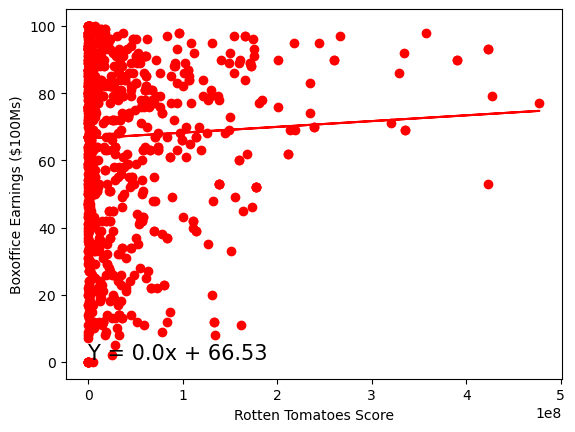

In [17]:
#Rotten Tomatoes Score vs Block Office Success
#Sort dataframe for Rotten Tomatoes scores
sorted_rot_score = movies_df.sort_values("Rotten Tomatoes", ascending = True)

#Plot Rotten scores vs earnings
plt.scatter(sorted_rot_score.iloc[:,0],sorted_rot_score.iloc[:,3],marker = "o", color = "red")

#Determine strength of relationship between Rotten score and boxoffice earnings
rot_correlation = st.pearsonr(sorted_rot_score.iloc[:,0],sorted_rot_score.iloc[:,3])
print(f"The correlation strength between Rotten Tomatoes score and boxoffice earnings is {round(rot_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(sorted_rot_score.iloc[:,0],sorted_rot_score.iloc[:,3])
regress_values3 = (sorted_rot_score.iloc[:,0])* slope3  + intercept3
line_eq3 = "Y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
print(f"The equation of the line is {line_eq3}")
plt.plot(sorted_rot_score.iloc[:,0],regress_values3,"r-")
plt.annotate(line_eq3,(5.8,0.8),fontsize = 15, color = "black")
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')


The correlation strength between IMDB score and boxoffice earnings is 0.34
The equation of the line is y = 57191334.27x + -155108009.17


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

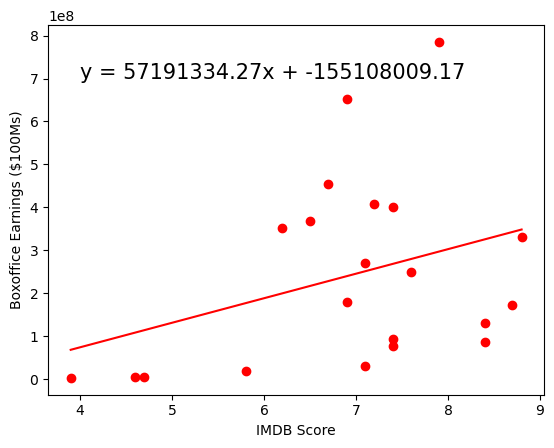

In [7]:
#Meta Score vs Block Office Success
#Create dataframe with sorted Meta scores
per_IMDB_score = pd.DataFrame({"IMDB Score":imdb_score,"Box Office Earnings":boxoffice})
sorted_IMBD_score = per_IMDB_score.sort_values("IMDB Score", ascending = True)


#Plot IMDB scores vs earnings
plt.scatter(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1],marker = "o", color = "red")

#Determine strenght of relationship between IMDB score and boxoffice earnings
IMDB_correlation = st.pearsonr(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
print(f"The correlation strength between IMDB score and boxoffice earnings is {round(IMDB_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1])
regress_values = (sorted_IMBD_score.iloc[:,0])* slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation of the line is {line_eq}")
plt.plot(sorted_IMBD_score.iloc[:,0],regress_values,"r-")
plt.annotate(line_eq,(4.0,700000000.0),fontsize = 15, color = "black")
plt.xlabel('IMDB Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

In [8]:
sorted_IMBD_score

,IMDB Score,Box Office Earnings
19,3.9,2423468.0
20,4.6,3818664.0
18,4.7,4343227.0
17,5.8,18450127.0
14,6.2,352390543.0
13,6.5,368384330.0
12,6.7,453829060.0
6,6.9,180258178.0
11,6.9,653406625.0
1,7.1,270578425.0


The correlation strength between meta score and boxoffice earnings is 0.44
The equation of the line is y = 4599483.38x + -36740657.98


Text(0, 0.5, 'Boxoffice Earnings ($100Ms)')

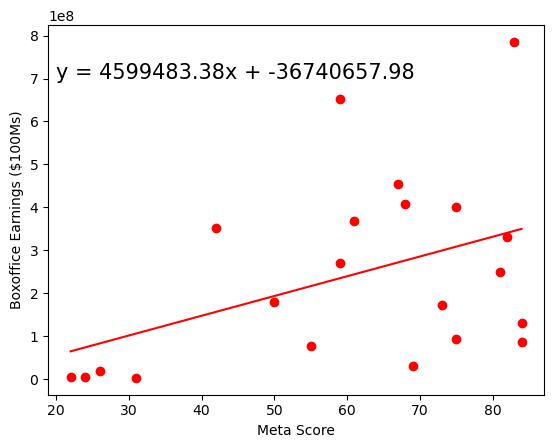

In [9]:
#Meta Score vs Block Office Success
#Create dataframe with sorted Meta scores
per_meta = pd.DataFrame({"Meta Score":meta_score,"Box Office Earnings":boxoffice})
sorted_meta_score = per_meta.sort_values("Meta Score", ascending = True)

#Plot meta scores vs earnings
plt.scatter(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1],marker = "o", color = "red")

#Determine strenght of relationship between meta score and boxoffice earnings
meta_correlation = st.pearsonr(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1])
print(f"The correlation strength between meta score and boxoffice earnings is {round(meta_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(sorted_meta_score.iloc[:,0],sorted_meta_score.iloc[:,1])
regress_values2 = (sorted_meta_score.iloc[:,0])* slope2  + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
print(f"The equation of the line is {line_eq2}")

plt.plot(sorted_meta_score.iloc[:,0],regress_values2,"r-")
plt.annotate(line_eq2,(20,700000000),fontsize = 15, color = "black")
plt.xlabel('Meta Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')
